In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
from google.colab import files
data = files.upload()

Saving Employee.csv to Employee.csv


In [3]:
df = pd.read_csv('/content/Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [4]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
df.shape

(4653, 9)

# Explory Data Analysis

In [7]:
#Visualize with Plotly Express
#1. Education Level Histogram
bchart1 = px.bar(df, x='Education',title='Education Distribution Chart')
bchart1.show()

In [8]:
#Search Datatype
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [9]:
#Search for Missing Value
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [10]:
#Search Unique in 'Object' Type Column
df.Education.nunique(),df.City.nunique(), df.Gender.nunique(),df.EverBenched.nunique()

(3, 3, 2, 2)

In [11]:
#Check for duplicated values
df.duplicated().sum()

1889

In [12]:
#Clean Duplicated Data
clean_df = df.drop_duplicates()
clean_df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [13]:
clean_df.shape

(2764, 9)

In [14]:
clean_df.duplicated().sum()

0

In [15]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


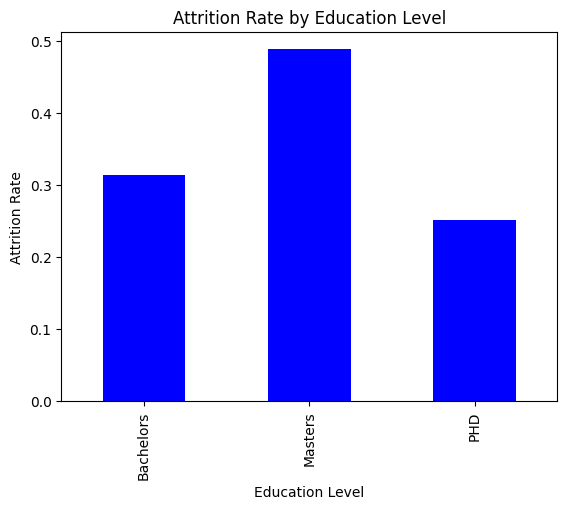

In [16]:
attrate_by_education = df.groupby('Education')['LeaveOrNot'].mean()
attrate_by_education.plot(kind='bar', color='blue')
plt.xlabel('Education Level')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Education Level')
plt.show()

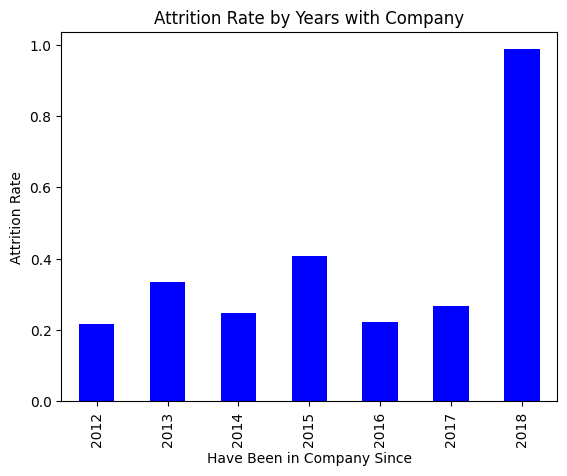

In [17]:
attrate_by_tenure = df.groupby('JoiningYear')['LeaveOrNot'].mean()

# Create a bar chart
attrate_by_tenure.plot(kind='bar', color='blue')
plt.xlabel('Have Been in Company Since')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Years with Company')
plt.show()

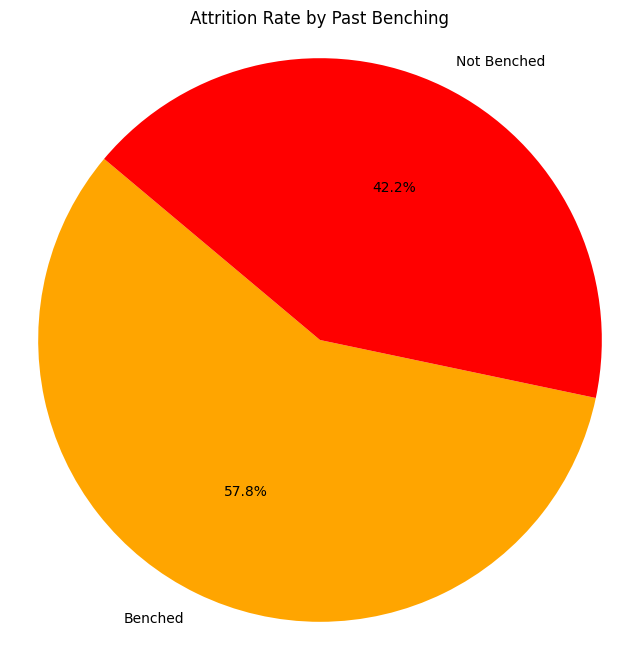

In [19]:
#Attration Rate by Benched in The Past
attrate_by_benching = df.groupby('EverBenched')['LeaveOrNot'].mean()

benched_attrate = attrate_by_benching.loc['Yes']
not_benched_attrate = attrate_by_benching.loc['No']

# Create a pie chart
plt.figure(figsize=(8, 8))
labels = ['Benched', 'Not Benched']
sizes = [benched_attrate, not_benched_attrate]
colors = ['orange', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title('Attrition Rate by Past Benching')
plt.axis('equal')

plt.show()

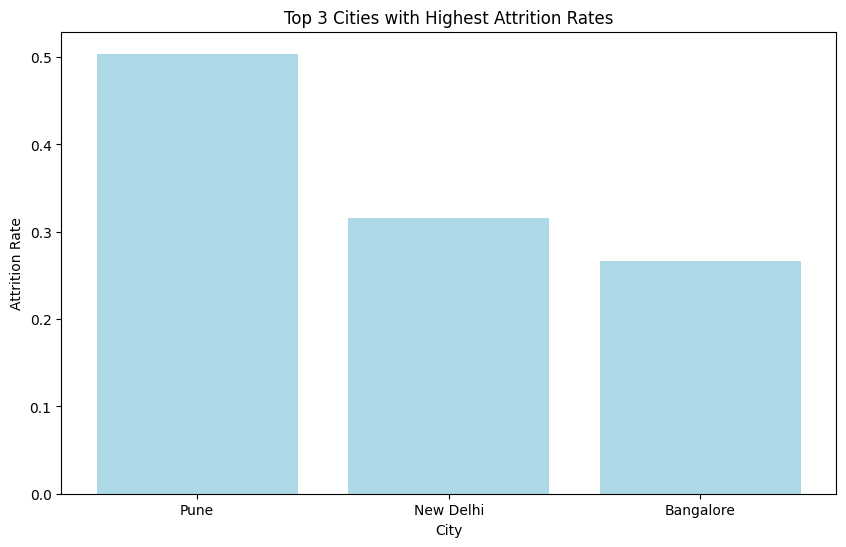

In [20]:
attrate_by_location = df.groupby('City')['LeaveOrNot'].mean()

attrate_by_location = attrate_by_location.sort_values(ascending=False) #Descending

top_5_locations = attrate_by_location.index[:5]
top_5_attrate = attrate_by_location[top_5_locations]

plt.figure(figsize=(10, 6))
locations = np.array(top_5_locations)
attrition_rates = np.array(top_5_attrate)
plt.bar(locations, attrition_rates, color='lightblue')
plt.xlabel('City')
plt.ylabel('Attrition Rate')
plt.title('Top 3 Cities with Highest Attrition Rates')
plt.show()

**For further Analyzation, We need to make the data into Integer type**

# Data Preprocess

**Label Encoder**

In [23]:
warnings.filterwarnings('ignore')
le = LabelEncoder()
clean_df['Education'] = le.fit_transform(clean_df.Education)
clean_df['Gender'] = le.fit_transform(clean_df.Gender)
clean_df['City'] = le.fit_transform(clean_df.City)
clean_df['EverBenched'] = le.fit_transform(clean_df.EverBenched)

In [24]:
#Data has been cleaned from strings
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


**Search for Data Outliers**

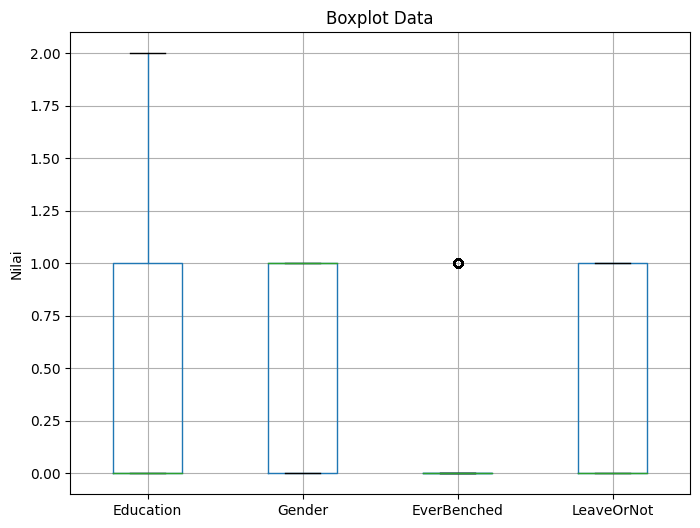

Data Outlier:
Age                             0
City                            0
Education                       0
EverBenched                     0
ExperienceInCurrentDomain       0
Gender                          0
JoiningYear                     0
LeaveOrNot                      0
PaymentTier                  1161
dtype: int64


In [25]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(8, 6))
clean_df.boxplot(column=['Education', 'Gender', 'EverBenched','LeaveOrNot'])
plt.title('Boxplot Data')
plt.ylabel('Nilai')
plt.show()

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print('Data Outlier:')
print(outliers)

In [26]:
clean_df.corr()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Education,1.000000,0.113858,0.111153,-0.071380,-0.107324,0.025057,-0.084810,0.043842,0.019661
JoiningYear,0.113858,1.000000,0.038988,-0.053823,0.024445,0.007990,0.042903,-0.031228,0.150650
City,0.111153,0.038988,1.000000,-0.209064,-0.071884,-0.098009,-0.036916,0.002805,0.127548
PaymentTier,-0.071380,-0.053823,-0.209064,1.000000,0.067514,0.172051,0.057464,-0.004602,-0.119891
Age,-0.107324,0.024445,-0.071884,0.067514,1.000000,0.037884,-0.078617,-0.053276,-0.114943
Gender,0.025057,0.007990,-0.098009,0.172051,0.037884,1.000000,0.052479,-0.019080,-0.190457
EverBenched,-0.084810,0.042903,-0.036916,0.057464,-0.078617,0.052479,1.000000,0.002259,0.037137
ExperienceInCurrentDomain,0.043842,-0.031228,0.002805,-0.004602,-0.053276,-0.019080,0.002259,1.000000,-0.021181
LeaveOrNot,0.019661,0.150650,0.127548,-0.119891,-0.114943,-0.190457,0.037137,-0.021181,1.000000


Text(0.5, 1.0, 'Correlation Between Variables')

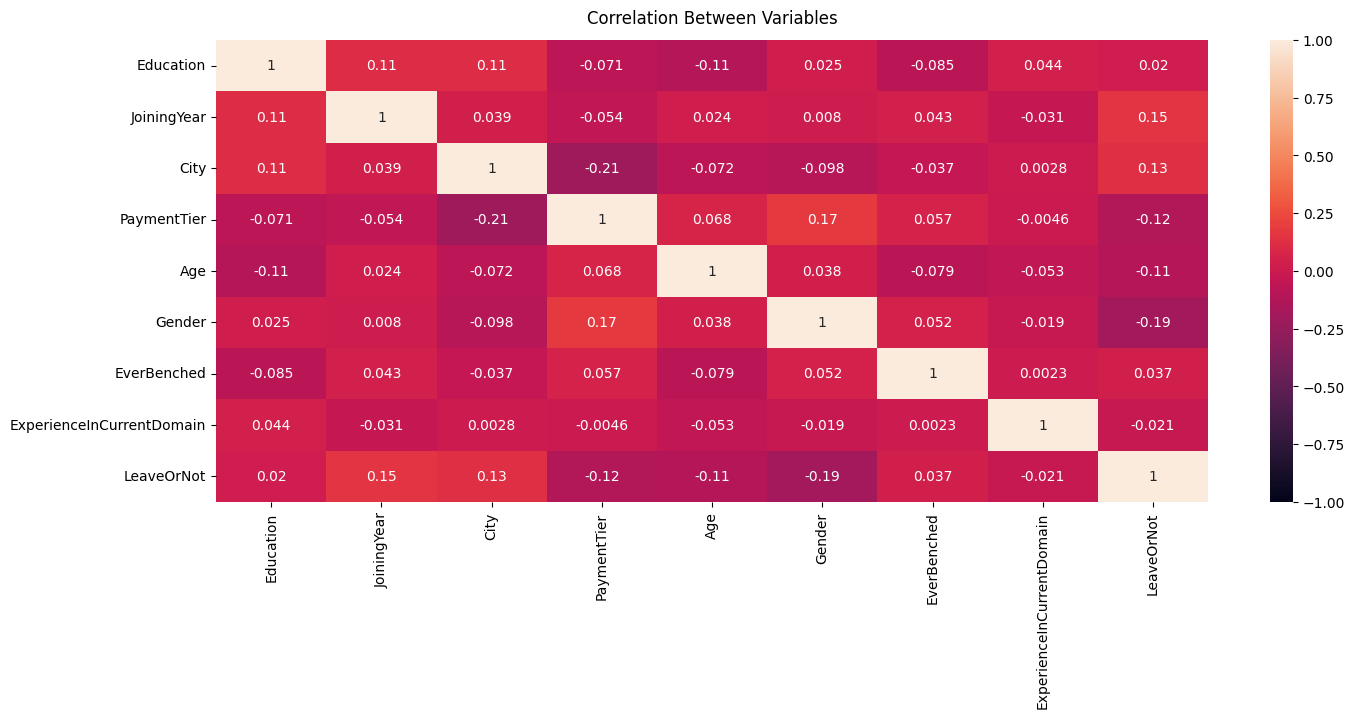

In [27]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(clean_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Between Variables', fontdict={'fontsize':12}, pad=12)

In [28]:
#Visualize Experience vs Payment Tier to See The Relation Between Two Variables
schart1 = px.scatter(clean_df, x='ExperienceInCurrentDomain', y='PaymentTier',
                  title='Experience vs Payment Tier')
schart1.show()

# Data Processing

In [29]:
X=clean_df.drop(columns='LeaveOrNot')
y=clean_df['LeaveOrNot']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1000,test_size=0.20)

In [30]:
X_test

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
3555,0,2015,1,2,33,0,0,3
2575,0,2013,0,3,29,1,0,2
1752,0,2012,1,3,28,1,0,5
215,0,2014,1,3,25,0,0,3
3815,0,2017,0,3,34,0,0,5
...,...,...,...,...,...,...,...,...
2384,1,2017,2,2,30,1,1,2
3294,1,2017,1,3,39,0,0,5
4239,0,2013,0,2,25,1,0,3
3564,0,2014,2,1,40,0,0,1


In [31]:
y_test

3555    1
2575    0
1752    0
215     0
3815    0
       ..
2384    0
3294    1
4239    1
3564    1
1788    1
Name: LeaveOrNot, Length: 553, dtype: int64

#Data Modelling

In [32]:
#SVM Method
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [33]:
# Prediction of SVM Model
y_pred_svm=svm.predict(X_test)

In [34]:
#KNN Model
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
y_pred_knn=knn.predict(X_test)

In [36]:
#Decision Tree Model
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
#Decision Tree Predict
y_pred_dt=dec_tree.predict(X_test)

# Evaluation

In [38]:
#Confusion Matrix for SVM Model
print('SVM Model')
y_train_pred=svm.predict(X_train)
y_test_pred=svm.predict(X_test)
train_accuracy=accuracy_score(y_train,y_train_pred)
print('Training Data:',train_accuracy)
test_accuracy1 = accuracy_score(y_test,y_test_pred)
print('Data Testing:',test_accuracy1)
classification_rep=classification_report(y_test,y_pred_svm)
print(classification_rep)

SVM Model
Training Data: 0.6698326549072817
Data Testing: 0.650994575045208
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       327
           1       0.61      0.40      0.48       226

    accuracy                           0.65       553
   macro avg       0.64      0.61      0.61       553
weighted avg       0.64      0.65      0.63       553



In [39]:
conf_matrix1 = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix1)

Confusion Matrix:
[[270  57]
 [136  90]]


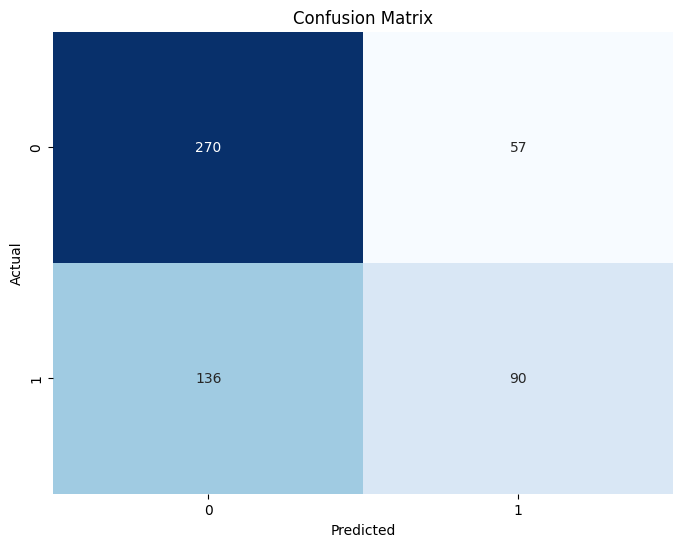

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
print('KNN Model')
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)
train_accuracy=accuracy_score(y_train,y_train_pred)
print('Training Data:',train_accuracy)
test_accuracy2=accuracy_score(y_test,y_test_pred)
print('Test Data:',test_accuracy2)
classification_rep=classification_report(y_test,y_pred_knn)
print(classification_rep)

KNN Model
Training Data: 0.8014473089099955
Test Data: 0.6980108499095841
              precision    recall  f1-score   support

           0       0.72      0.79      0.76       327
           1       0.65      0.56      0.60       226

    accuracy                           0.70       553
   macro avg       0.69      0.68      0.68       553
weighted avg       0.69      0.70      0.69       553



In [42]:
conf_matrix1 = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix1)

Confusion Matrix:
[[259  68]
 [ 99 127]]


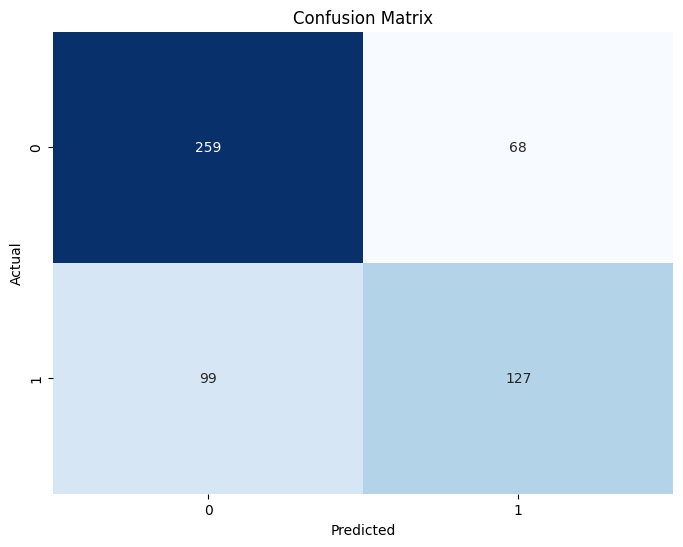

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
print('Decision Tree Model')
y_train_pred=dec_tree.predict(X_train)
y_test_pred=dec_tree.predict(X_test)
train_accuracy=accuracy_score(y_train,y_train_pred)
print('Training Data:',train_accuracy)
test_accuracy3=accuracy_score(y_test,y_test_pred)
print('Test Data:',test_accuracy3)
classification_rep=classification_report(y_test,y_pred_dt)
print(classification_rep)

Decision Tree Model
Training Data: 0.9317051108095884
Test Data: 0.6962025316455697
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       327
           1       0.63      0.61      0.62       226

    accuracy                           0.70       553
   macro avg       0.69      0.68      0.68       553
weighted avg       0.69      0.70      0.70       553



<Axes: >

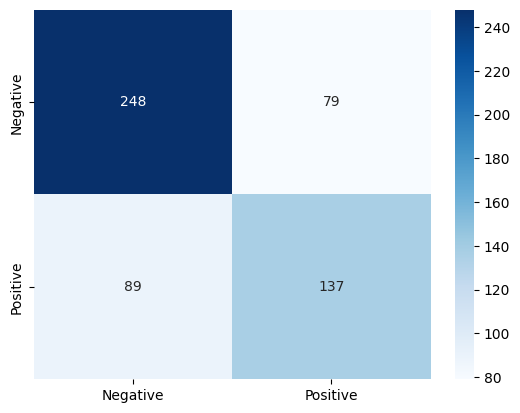

In [58]:
conf_matrix=confusion_matrix(y_test,y_pred_dt)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',
           xticklabels=['Negative','Positive'],
           yticklabels=['Negative','Positive'])

# Result

In [54]:
model1= "SVM"
model2 = "KNN"
model3 = "Decision Tree"

result = {"Models": [model1, model2, model3],
           "Accuracy by True Predicted": [406, 358, 336]}

for (key, value) in result.items():
    if key=="Accuracy by True Predicted":
        result[key]=  [item for item in result[key]]


table_result=pd.DataFrame(result)

In [55]:
table_result

,Models,Accuracy by True Predicted
0,SVM,406
1,KNN,358
2,Decision Tree,336


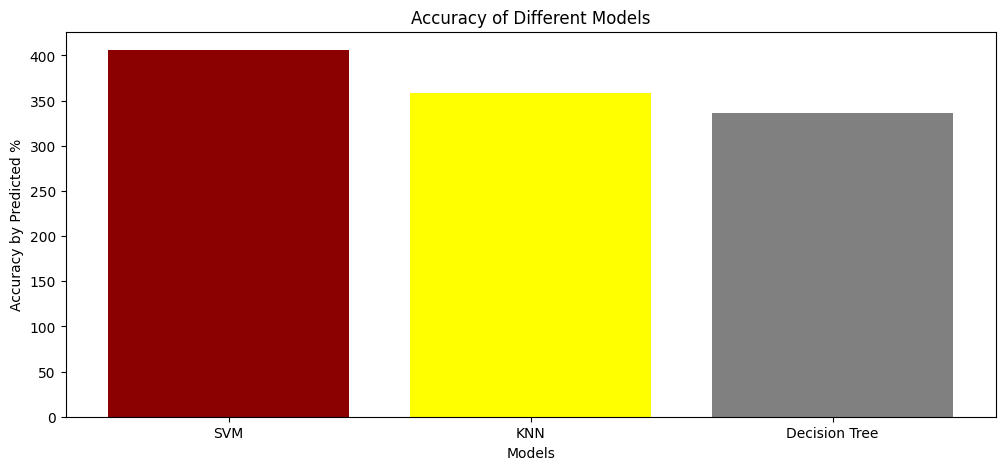

In [56]:
colors = ['darkred','yellow','grey']
plt.figure(figsize=(12,5))
plt.title("Accuracy of Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy by Predicted %")
plt.bar(table_result['Models'],table_result['Accuracy by True Predicted'],color = colors)
plt.show()